<h1 style ="font-size:3rem; color:blue;">*Predict "tip" Based on "quality" and "service" Using Fuzzy Logic</h1><br/>


In [40]:
#import numpy and skfuzzy libraries
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [55]:
#Define input and output
quality = ctrl.Antecedent(np.arange(0, 11, 1), 'quality')
service = ctrl.Antecedent(np.arange(0, 11, 1), 'service')
tip = ctrl.Consequent(np.arange(0, 26, 1), 'tip')

In [56]:
quality.automf(3)
service.automf(3)

In [57]:
tip['low'] = fuzz.trimf(tip.universe, [0, 0, 13])
tip['medium'] = fuzz.trimf(tip.universe, [0, 13, 25])
tip['high'] = fuzz.trimf(tip.universe, [13, 25, 25])

/Users/mikalshrestha/opt/anaconda3/lib/python3.9/site-packages/skfuzzy/control/term.py:74: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


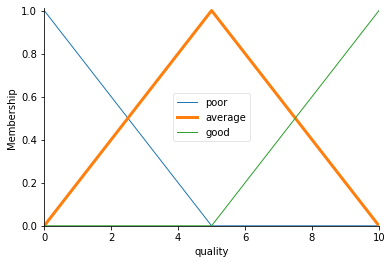

In [58]:
quality['average'].view()

/Users/mikalshrestha/opt/anaconda3/lib/python3.9/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


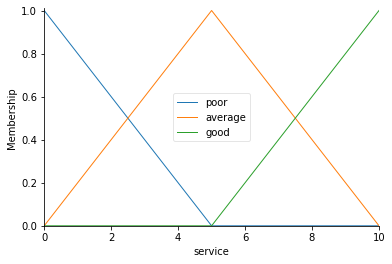

In [59]:
service.view()

/Users/mikalshrestha/opt/anaconda3/lib/python3.9/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


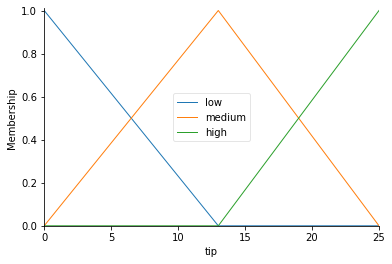

In [60]:
tip.view()

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

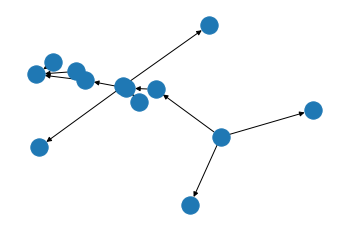

In [62]:
rule1 = ctrl.Rule(quality['poor'] & service['poor'], tip['low'])
rule1.view
rule1.view()

In [63]:
rule2 = ctrl.Rule(service['average'] & service['average'], tip['medium'])


In [64]:
rule3 = ctrl.Rule(service['good'] & service['good'], tip['high'])


In [65]:
tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)

In [66]:
tipping.input['quality'] = 7.5
tipping.input['service'] = 9.5


In [67]:
tipping.compute()

In [68]:
print(tipping.output['tip'])

18.482738780207132


/Users/mikalshrestha/opt/anaconda3/lib/python3.9/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


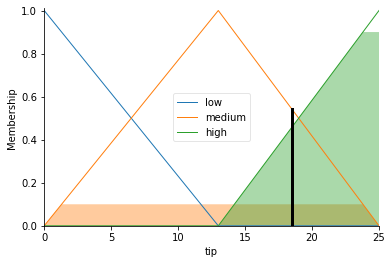

In [69]:
tip.view(sim=tipping)